# EMPLOYEE ATTRITION PREDICTION

## Importing libraries and dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

importing the dataset and also defining missing values for easy data manipulation

In [4]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

df = pd.read_csv('Employee_Attrition.csv', na_values = missing_value_formats)


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [8]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,3.171444,Male,NaN,3.372679,1.993840,Laboratory Technician,4.169226,Married,2806.950012,13077.116879,4.081321,Y,No,17.915157,2.968558,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,4.284094,Male,39.842324,2.038727,2.532482,Healthcare Representative,NaN,Married,NaN,21026.154051,NaN,Y,No,14.692325,2.800889,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,2.152282,Male,91.603642,4.394863,1.964613,Manufacturing Director,2.152039,Married,6609.842365,NaN,1.017623,Y,Yes,18.744411,NaN,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,4.095580,Male,59.110216,2.019760,1.925025,Sales Executive,NaN,Married,5585.302599,11837.891371,1.591695,NaN,No,12.930373,3.221402,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN
1469,38.133892,No,Travel_Rarely,703.677110,Research & Development,7.231661,3.292684,Medical,1.061133,NaN,1.738502,Male,67.262829,4.478969,2.291543,Laboratory Technician,2.875309,Married,5188.877974,10276.024987,2.364262,Y,No,10.343964,3.053256,1.076817,82.610288,0.000000,6.493763,3.451604,4.376818,3.755110,3.308961,1.070952,2.025939


In [9]:
df.shape

(1470, 35)

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Descriptive Statistics

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,2.715272,6544.718401,14364.334764,2.654394,15.295717,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,1.146786,4766.580903,7269.420895,2.508952,3.995702,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,0.724192,891.481007,1567.502382,0.000000,7.684723,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,1.846039,2961.844066,8138.576694,0.948843,12.195197,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,2.895032,4957.070475,14258.293365,1.708812,14.495151,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,3.676663,8268.002496,20322.279885,3.959710,17.745736,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,5.251277,22858.020388,32751.715800,10.855733,29.797261,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [12]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [13]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1323.0,36.635268,9.882161,14.544608,29.624982,34.951950,42.748741,69.402515
DailyRate,1323.0,802.030050,414.031025,86.828045,456.479553,782.958705,1130.577949,1784.394456
DistanceFromHome,1323.0,9.091097,8.177870,0.750112,2.147069,6.920808,13.584900,33.684424
Education,1323.0,2.923447,1.072203,0.770362,2.122706,3.015658,3.700560,6.285161
EmployeeCount,1323.0,0.999325,0.099656,0.628985,0.931146,0.998949,1.067371,1.290613
EmployeeNumber,1323.0,1026.679166,610.480802,1.054148,501.854842,1022.025017,1533.811096,2530.919375
EnvironmentSatisfaction,1323.0,2.726443,1.129679,0.759655,1.894818,2.887313,3.676600,5.254672
HourlyRate,1323.0,65.647722,21.469709,23.855272,47.701897,64.934490,83.038355,123.200439
JobInvolvement,1323.0,2.743028,0.765568,0.722008,2.177638,2.859143,3.179128,5.241968
JobLevel,1323.0,2.058270,1.127018,0.715172,1.045228,1.936150,2.609707,5.942269


## Data Preparation

for the purposes of this analysis i will use 'attrition' as the target variable, first have to check if there are any missing values in the target variable then convert the variables to integers

In [14]:
df['Attrition'].value_counts()

No     1065
Yes     258
Name: Attrition, dtype: int64

In [15]:
df['Attrition'].unique()

array(['Yes', 'No', nan], dtype=object)

to handle the missing data in the target variable i am going to just drop the missing values in the column, as imputation might introduce a bias to the machine learning models

In [16]:
df.dropna(subset=['Attrition'], inplace=True)

In [17]:
df. shape

(1323, 35)

In [18]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

changing the attrition values to binary 

In [19]:
df['Attrition'] = np.where(df['Attrition']=='Yes', 1,0)

In [20]:
df['Attrition'].value_counts()

0    1065
1     258
Name: Attrition, dtype: int64

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,1,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


remove some columns which have the same information, for example, daily rate, hourly rate monthly rate etc. and also columns with constant values for example StandardHours as these will not have an effect on the modelling for machine learning

In [22]:
to_remove = ['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber', 'StandardHours']
df.drop(columns = to_remove, inplace=True)
df.shape

(1323, 30)

### renaming of colmns


In [23]:
new_columns = {'BusinessTravel': 'travel', 'Department': 'dpt',
       'DistanceFromHome': 'distance', 'EducationField':'field', 
       'EmployeeNumber': 'ID', 'EnvironmentSatisfaction': 'environment', 'HourlyRate': 'rate',
       'JobInvolvement': 'involement', 'JobLevel': 'level', 'JobRole': 'role', 'JobSatisfaction': 'job',
       'MaritalStatus': 'marriage', 'NumCompaniesWorked': 'companies',
       'PercentSalaryHike': 'hike', 'PerformanceRating': 'rating',
       'RelationshipSatisfaction': 'rlation', 'StandardHours': 'hours', 'StockOptionLevel': 'stocks',
       'TotalWorkingYears': 'yrsworked', 'TrainingTimesLastYear': 'training', 'WorkLifeBalance': 'wlb',
       'YearsAtCompany': 'yrs', 'YearsInCurrentRole': 'yrsrole', 'YearsSinceLastPromotion': 'yrspromo',
       'YearsWithCurrManager': 'yrsmanager', 'EmployeeCount': 'count'}

df.rename(columns = new_columns, inplace=True)

In [24]:
df.columns

Index(['Age', 'Attrition', 'travel', 'dpt', 'distance', 'Education', 'field',
       'count', 'environment', 'Gender', 'rate', 'involement', 'level', 'role',
       'job', 'marriage', 'companies', 'Over18', 'OverTime', 'hike', 'rating',
       'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole',
       'yrspromo', 'yrsmanager'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1188 non-null   float64
 1   Attrition    1323 non-null   int32  
 2   travel       1188 non-null   object 
 3   dpt          1187 non-null   object 
 4   distance     1191 non-null   float64
 5   Education    1190 non-null   float64
 6   field        1190 non-null   object 
 7   count        1198 non-null   float64
 8   environment  1191 non-null   float64
 9   Gender       1191 non-null   object 
 10  rate         1187 non-null   float64
 11  involement   1193 non-null   float64
 12  level        1190 non-null   float64
 13  role         1189 non-null   object 
 14  job          1187 non-null   float64
 15  marriage     1194 non-null   object 
 16  companies    1190 non-null   float64
 17  Over18       1189 non-null   object 
 18  OverTime     1192 non-null   object 
 19  hike  

In [26]:
unique_counts = df.nunique()

print(unique_counts)


Age            1188
Attrition         2
travel            3
dpt               3
distance       1191
Education      1190
field             6
count          1198
environment    1191
Gender            2
rate           1187
involement     1193
level          1190
role              9
job            1187
marriage          3
companies      1025
Over18            1
OverTime          2
hike           1189
rating         1189
rlation        1187
stocks          703
yrsworked      1183
training       1141
wlb            1194
yrs            1153
yrsrole        1004
yrspromo        721
yrsmanager      975
dtype: int64


dealing with duplicate rows

In [27]:
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, travel, dpt, distance, Education, field, count, environment, Gender, rate, involement, level, role, job, marriage, companies, Over18, OverTime, hike, rating, rlation, stocks, yrsworked, training, wlb, yrs, yrsrole, yrspromo, yrsmanager]
Index: []


In [28]:
print(df.isnull().sum())

Age            135
Attrition        0
travel         135
dpt            136
distance       132
Education      133
field          133
count          125
environment    132
Gender         132
rate           136
involement     130
level          133
role           134
job            136
marriage       129
companies      133
Over18         134
OverTime       131
hike           134
rating         134
rlation        136
stocks         130
yrsworked      133
training       139
wlb            129
yrs            133
yrsrole        125
yrspromo       131
yrsmanager     139
dtype: int64


In [29]:
data = df.dropna()

In [30]:
data.shape

(67, 30)

. dropping null values for this dataset ends up with us loosing most of the data hence it is not the best method of handling missing values

. so for float values i will use the median to impute the values whereas for object values i will use the mode

In [31]:
float_columns = df.select_dtypes(include=['float']).columns

df[float_columns] = df[float_columns].apply(lambda x: x.fillna(x.median()))


- i filled the missing values with the median because there are outliers in each column.

In [32]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns] = df[object_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [33]:
print(df.isnull().sum())

Age            0
Attrition      0
travel         0
dpt            0
distance       0
Education      0
field          0
count          0
environment    0
Gender         0
rate           0
involement     0
level          0
role           0
job            0
marriage       0
companies      0
Over18         0
OverTime       0
hike           0
rating         0
rlation        0
stocks         0
yrsworked      0
training       0
wlb            0
yrs            0
yrsrole        0
yrspromo       0
yrsmanager     0
dtype: int64


In [34]:
df.describe()

,Age,Attrition,distance,Education,count,environment,rate,involement,level,job,companies,hike,rating,rlation,stocks,yrsworked,training,wlb,yrs,yrsrole,yrspromo,yrsmanager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.456652,0.195011,8.797901,2.945800,0.998793,2.722806,65.666827,2.756004,2.041072,2.744154,2.506335,15.232905,3.140701,2.719177,0.835797,11.216745,2.798238,2.782077,6.779927,4.129487,2.052475,4.025313
std,9.260589,0.396359,7.770816,1.013012,0.094759,1.072044,20.290162,0.731285,1.077081,1.078854,2.428990,3.791444,0.452851,1.062314,0.820941,7.646156,1.261799,0.722917,5.699313,3.503560,3.064896,3.428990
min,14.544608,0.000000,0.750112,0.770362,0.628985,0.759655,23.855272,0.830635,0.715172,0.744694,0.000000,7.684723,2.116951,0.720696,0.000000,0.000000,0.000000,0.810358,0.000000,0.000000,0.000000,0.000000
25%,30.449915,0.000000,2.251218,2.215066,0.938312,1.939364,49.329204,2.237608,1.065065,1.957366,0.965302,12.457861,2.874351,1.952143,0.000000,6.393293,2.010746,2.309007,3.010641,1.889414,0.000000,1.827485
50%,34.966424,0.000000,6.708286,3.018832,0.998744,2.861434,65.145548,2.864242,1.926837,2.900205,1.265997,14.540200,3.062603,2.887854,0.920076,9.285336,2.674446,2.901577,5.422295,2.983257,0.967975,2.961557
75%,41.584252,0.000000,11.538223,3.608317,1.058343,3.478753,81.458186,3.142034,2.288125,3.549544,3.690748,17.108845,3.300524,3.450941,1.066748,14.148469,3.263556,3.171958,8.813044,6.781056,2.128580,6.735688
max,66.943784,1.000000,33.684424,6.285161,1.290613,5.152047,123.200439,5.241968,5.942269,5.251277,10.855733,29.417952,5.013371,4.975640,3.454487,43.621947,7.503201,4.835748,36.848408,19.091844,17.273662,19.976003


Of note is the minimum age of 14years, but in the column for Over18 there is no value for less than 18, i will drop this roll as it contains false information

In [35]:
df['Age'].value_counts()

34.966424    135
41.920786      1
56.943798      1
32.688775      1
25.134185      1
            ... 
55.035564      1
38.424509      1
34.033253      1
19.465334      1
38.133892      1
Name: Age, Length: 1189, dtype: int64

In [36]:
df['Over18'].value_counts()

Y    1323
Name: Over18, dtype: int64

In [37]:
dfa = df[df['Age'] >= 18]

In [38]:
dfa.head()

,Age,Attrition,travel,dpt,distance,Education,field,count,environment,Gender,rate,involement,level,role,job,marriage,companies,Over18,OverTime,hike,rating,rlation,stocks,yrsworked,training,wlb,yrs,yrsrole,yrspromo,yrsmanager
0,41.920786,1,Travel_Rarely,Sales,1.016716,1.770313,Life Sciences,1.033298,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,7.077818,Y,Yes,9.898765,2.844897,1.012832,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,0,Travel_Frequently,Research & Development,6.708286,1.035333,Life Sciences,0.944859,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,1.114423,Y,No,14.540200,4.120281,4.312008,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,1,Travel_Rarely,Research & Development,2.198662,2.118801,Other,0.810809,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,5.539591,Y,Yes,15.401596,2.781168,2.332558,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,0,Travel_Frequently,Sales,2.937851,3.670674,Life Sciences,0.822976,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,0.772793,Y,Yes,9.757546,2.769576,3.029591,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,0,Travel_Rarely,Research & Development,1.988953,1.120496,Medical,0.998744,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,10.118125,Y,No,11.920147,3.282183,2.887854,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [39]:
dfa.shape

(1318, 30)

Also for several columns the values are in float, these have to be rounded off for easy handling in data preparation, statistical analysis and even machine learning modelling.

In [40]:
decimal_columns = dfa.select_dtypes(include=['float']).columns

print("Columns with decimal values:", list(decimal_columns))


Columns with decimal values: ['Age', 'distance', 'Education', 'count', 'environment', 'rate', 'involement', 'level', 'job', 'companies', 'hike', 'rating', 'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']


In [41]:
dfa[decimal_columns] = dfa[decimal_columns].round().astype(int)


In [42]:
dfa.head()

,Age,Attrition,travel,dpt,distance,Education,field,count,environment,Gender,rate,involement,level,role,job,marriage,companies,Over18,OverTime,hike,rating,rlation,stocks,yrsworked,training,wlb,yrs,yrsrole,yrspromo,yrsmanager
0,42,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Male,94,3,2,Sales Executive,3,Single,7,Y,Yes,10,3,1,0,8,0,1,6,4,0,5
1,52,0,Travel_Frequently,Research & Development,7,1,Life Sciences,1,3,Male,52,2,2,Research Scientist,2,Married,1,Y,No,15,4,4,1,9,3,3,10,8,1,6
2,33,1,Travel_Rarely,Research & Development,2,2,Other,1,4,Male,87,2,1,Laboratory Technician,3,Single,6,Y,Yes,15,3,2,0,8,3,3,0,0,0,0
3,35,0,Travel_Frequently,Sales,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,1,Y,Yes,10,3,3,0,8,3,3,8,6,3,0
4,25,0,Travel_Rarely,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,10,Y,No,12,3,3,1,6,3,3,2,2,2,2


In [43]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1318 non-null   int32 
 1   Attrition    1318 non-null   int32 
 2   travel       1318 non-null   object
 3   dpt          1318 non-null   object
 4   distance     1318 non-null   int32 
 5   Education    1318 non-null   int32 
 6   field        1318 non-null   object
 7   count        1318 non-null   int32 
 8   environment  1318 non-null   int32 
 9   Gender       1318 non-null   object
 10  rate         1318 non-null   int32 
 11  involement   1318 non-null   int32 
 12  level        1318 non-null   int32 
 13  role         1318 non-null   object
 14  job          1318 non-null   int32 
 15  marriage     1318 non-null   object
 16  companies    1318 non-null   int32 
 17  Over18       1318 non-null   object
 18  OverTime     1318 non-null   object
 19  hike         1318 non-null 

## Explatory Data Analysis

### Detection Outliers

In [44]:
integer_columns = dfa.select_dtypes(include='int').columns.tolist()

print("Integer columns:", integer_columns)


Integer columns: ['Age', 'Attrition', 'distance', 'Education', 'count', 'environment', 'rate', 'involement', 'level', 'job', 'companies', 'hike', 'rating', 'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']


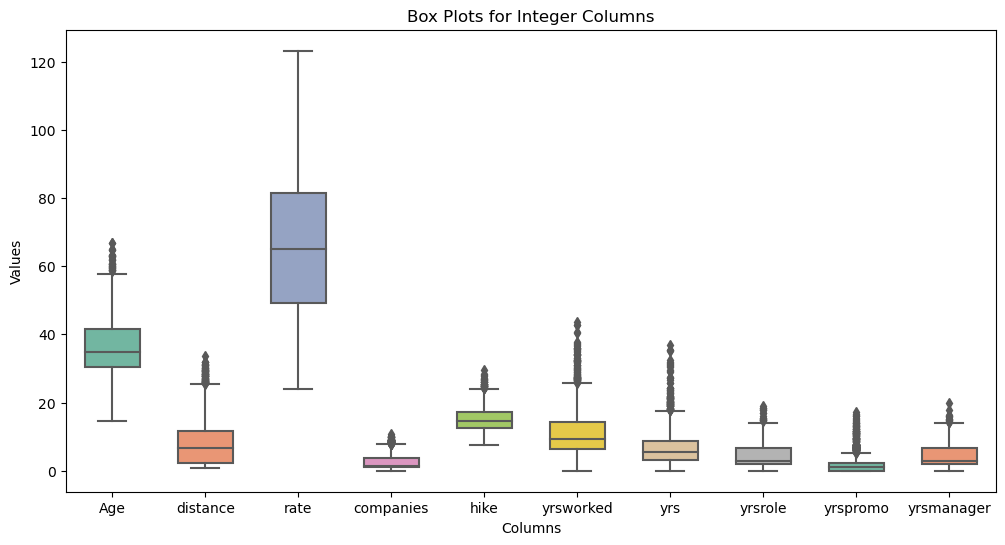

In [45]:
columns_to_plot = ['Age', 'distance', 'rate', 'companies', 'hike', 'yrsworked', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[columns_to_plot], width=0.6, palette="Set2")

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plots for Integer Columns")

plt.show()


There are outliers noted in the dataset, however i feel the data points are valid for this study, for example the Age attribute has outliers which are approximately 70years of which depending with the nature of the job some people can work upto that age.

## Sample Questions to answer in this analysis

- do employees tend to leave work work as they get older
- does distance travelled to work affect whether the employee keeps their job or not
- does the education field also affect if an employee stays
- do higher earners tend to keep their jobs
- what roles do the higher earners have in the company
- those who have changed companies before do they tend to keep their trend
- if one is married does it mean their more stable with jobs
- do the managers have an influence on employees staying on their jobs
- if there is gender imbalance in the company

<Axes: xlabel='Attrition', ylabel='Age'>

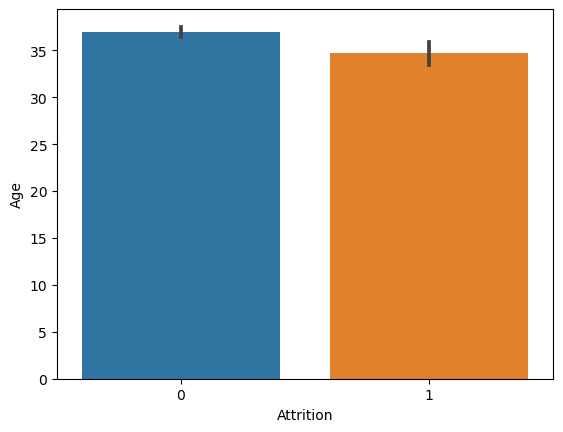

In [46]:
sns.barplot(x="Attrition", y="Age", data=dfa)

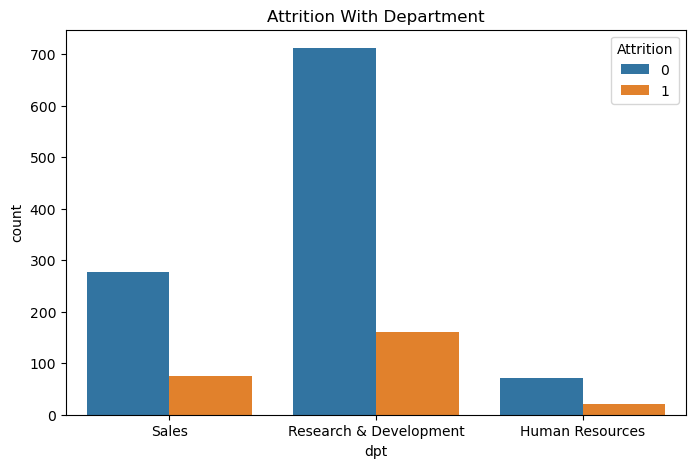

In [47]:
plt.figure(figsize=(8,5))

sns.countplot(x='dpt',hue='Attrition', data=dfa)

plt.title("Attrition With Department")

plt.show()

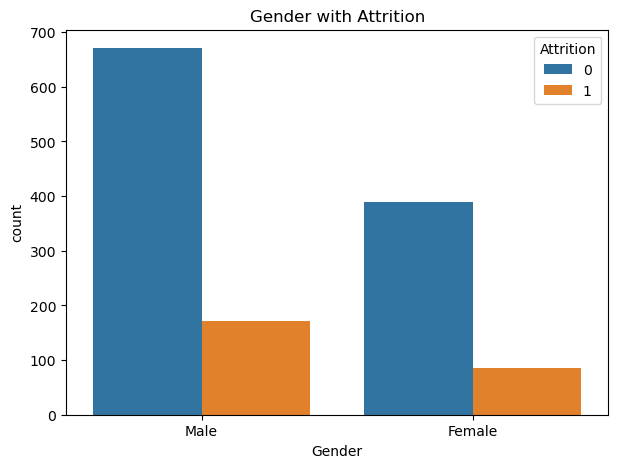

In [48]:
plt.figure(figsize=(7,5))

sns.countplot(x='Gender',hue='Attrition', data=dfa)

plt.title("Gender with Attrition")

plt.show()

In [49]:
dfa['Gender'].value_counts()

Male      842
Female    476
Name: Gender, dtype: int64

In [50]:
dfa['count'] = 1

In [51]:
dfa.groupby(['Gender', 'Attrition']).agg({"count":"sum"})

count
Gender Attrition       
Female 0            390
       1             86
Male   0            671
       1            171

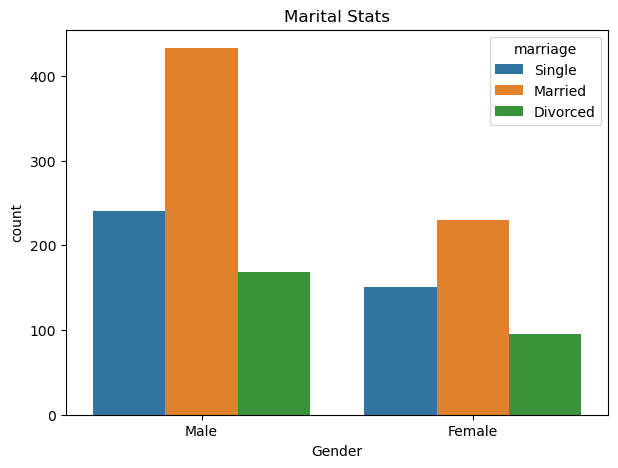

In [52]:
plt.figure(figsize=(7,5))

sns.countplot(x='Gender',hue='marriage', data=dfa)

plt.title("Marital Stats")

plt.show()

In [53]:
dfa.groupby(['marriage', 'Attrition']).agg({"count":"sum"})

count
marriage Attrition       
Divorced 0            223
         1             41
Married  0            554
         1            109
Single   0            284
         1            107

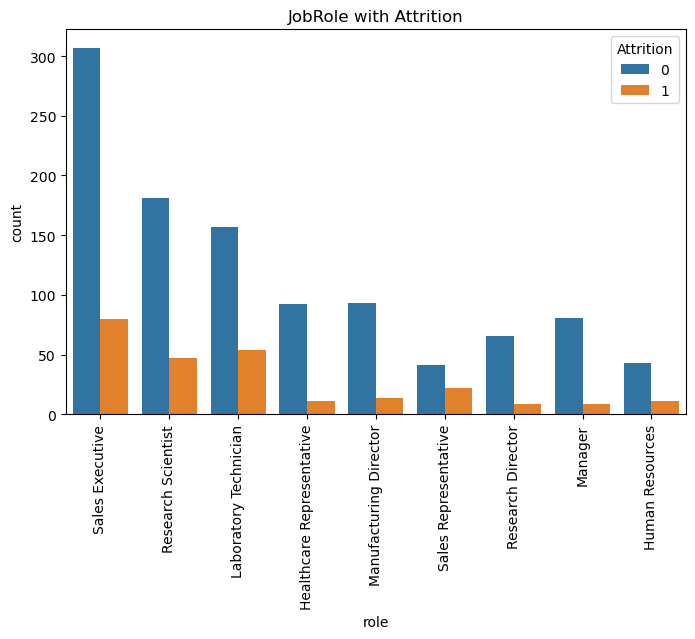

In [54]:
plt.figure(figsize=(8,5))

sns.countplot(x='role',hue='Attrition', data=dfa)

plt.title("JobRole with Attrition")

plt.xticks(rotation=90)

plt.show()

Text(0.5, 0.98, 'hourly rate based on daily rate and department')

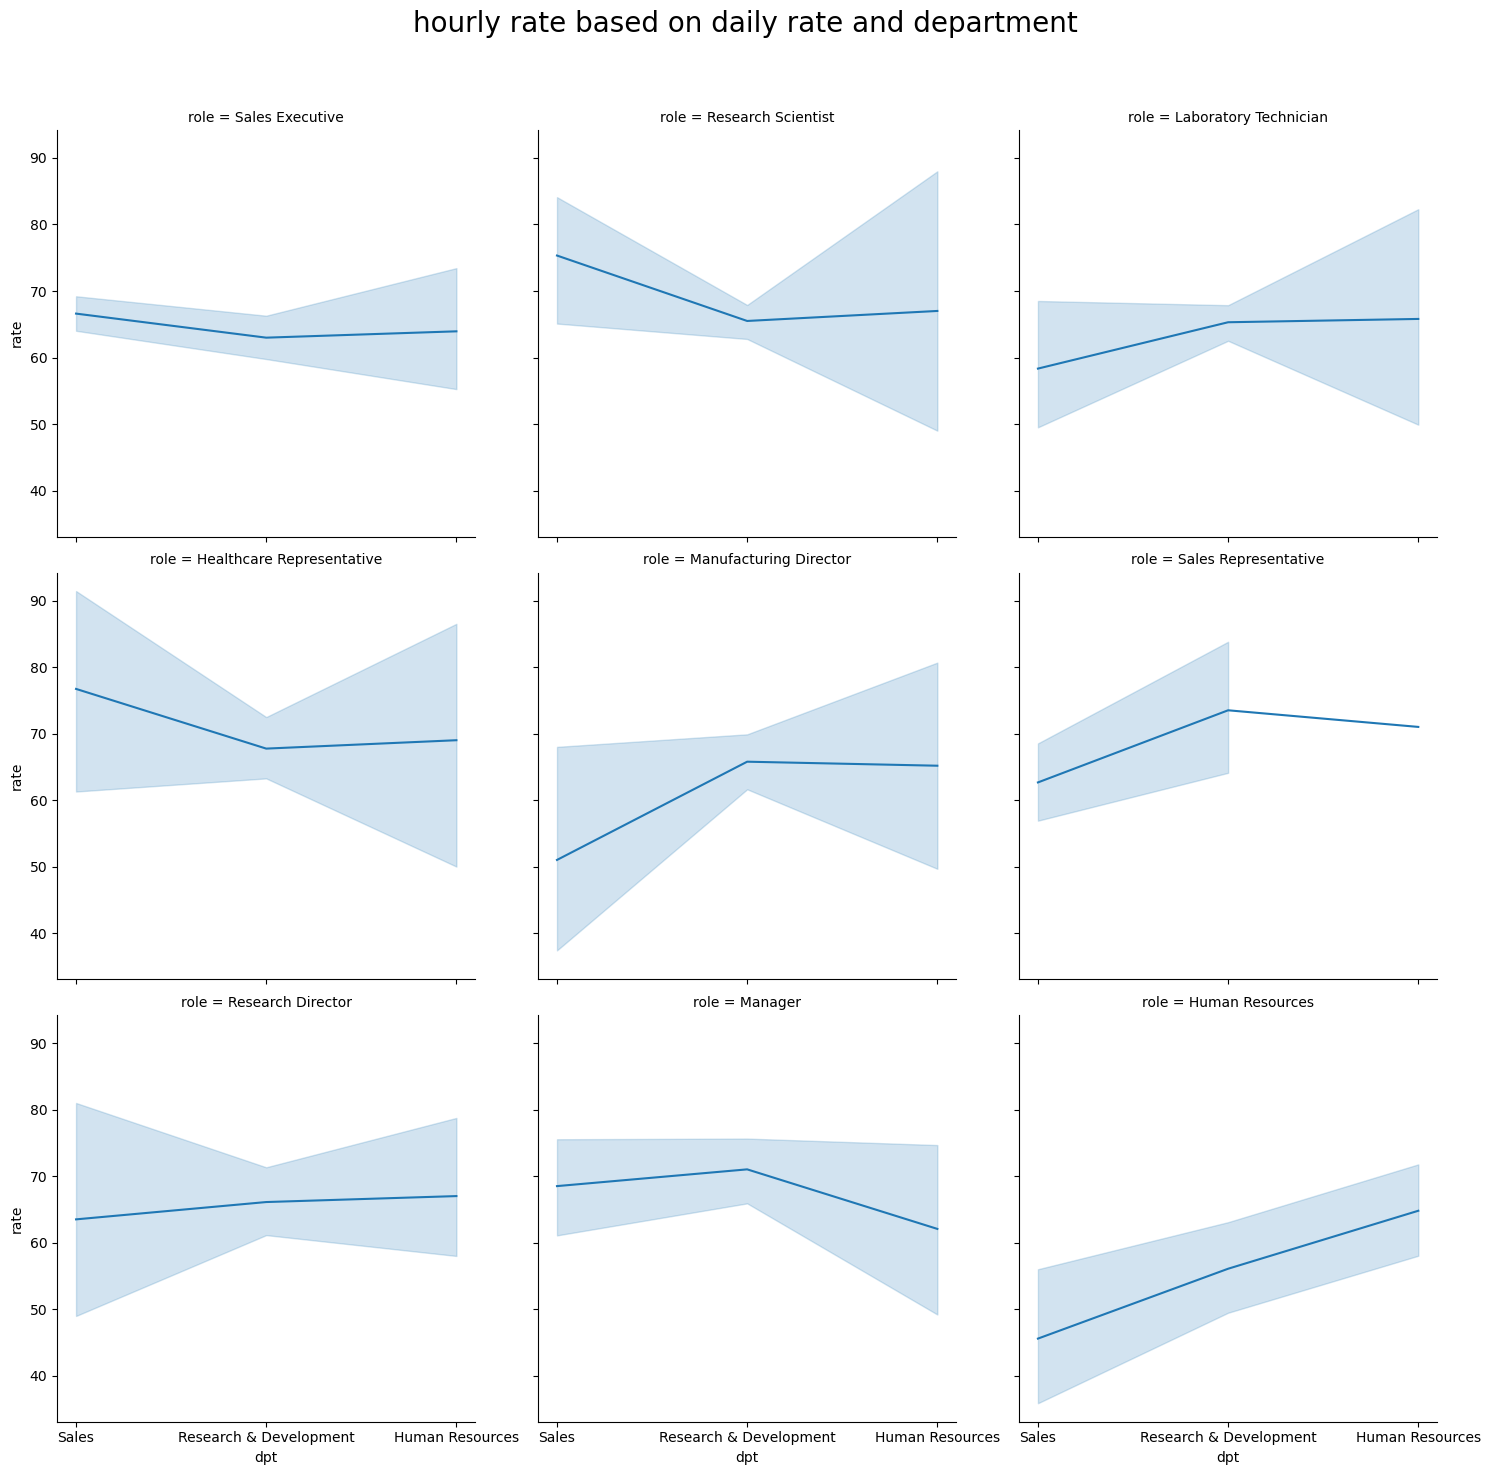

In [55]:
ax = sns.relplot(col="role", y="rate", kind="line",x='dpt', data=dfa, col_wrap=3)

ax.fig.subplots_adjust(top=0.9)

ax.fig.suptitle('hourly rate based on daily rate and department',fontsize=20)

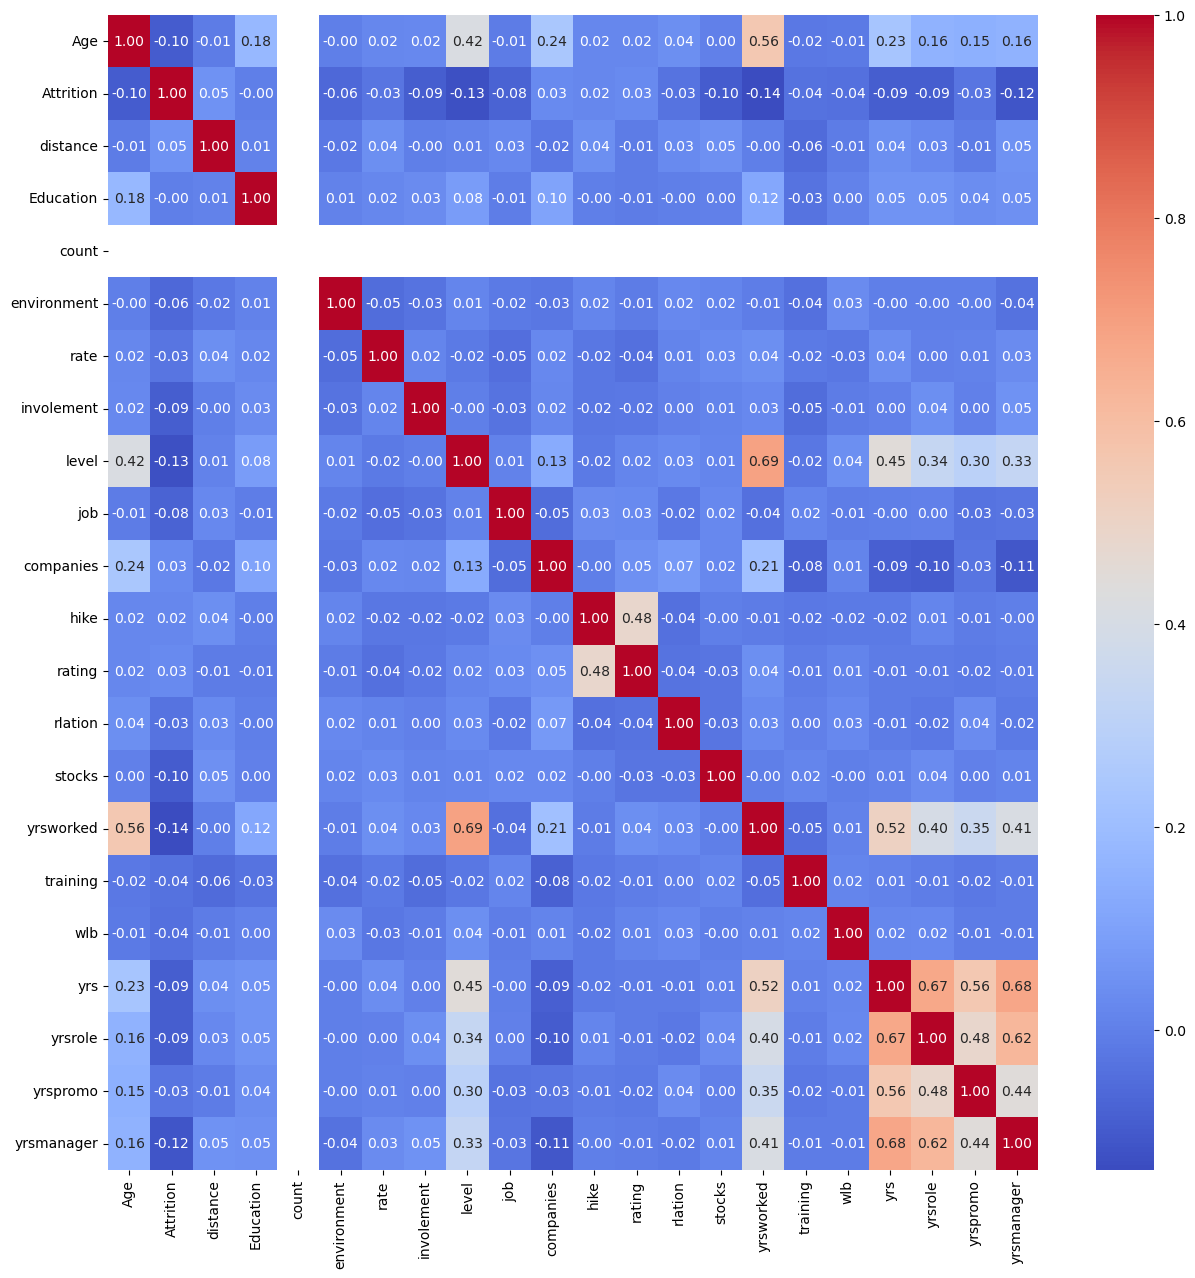

In [56]:
correlation_matrix = dfa.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [57]:
dfa.drop('count', axis=1, inplace=True)


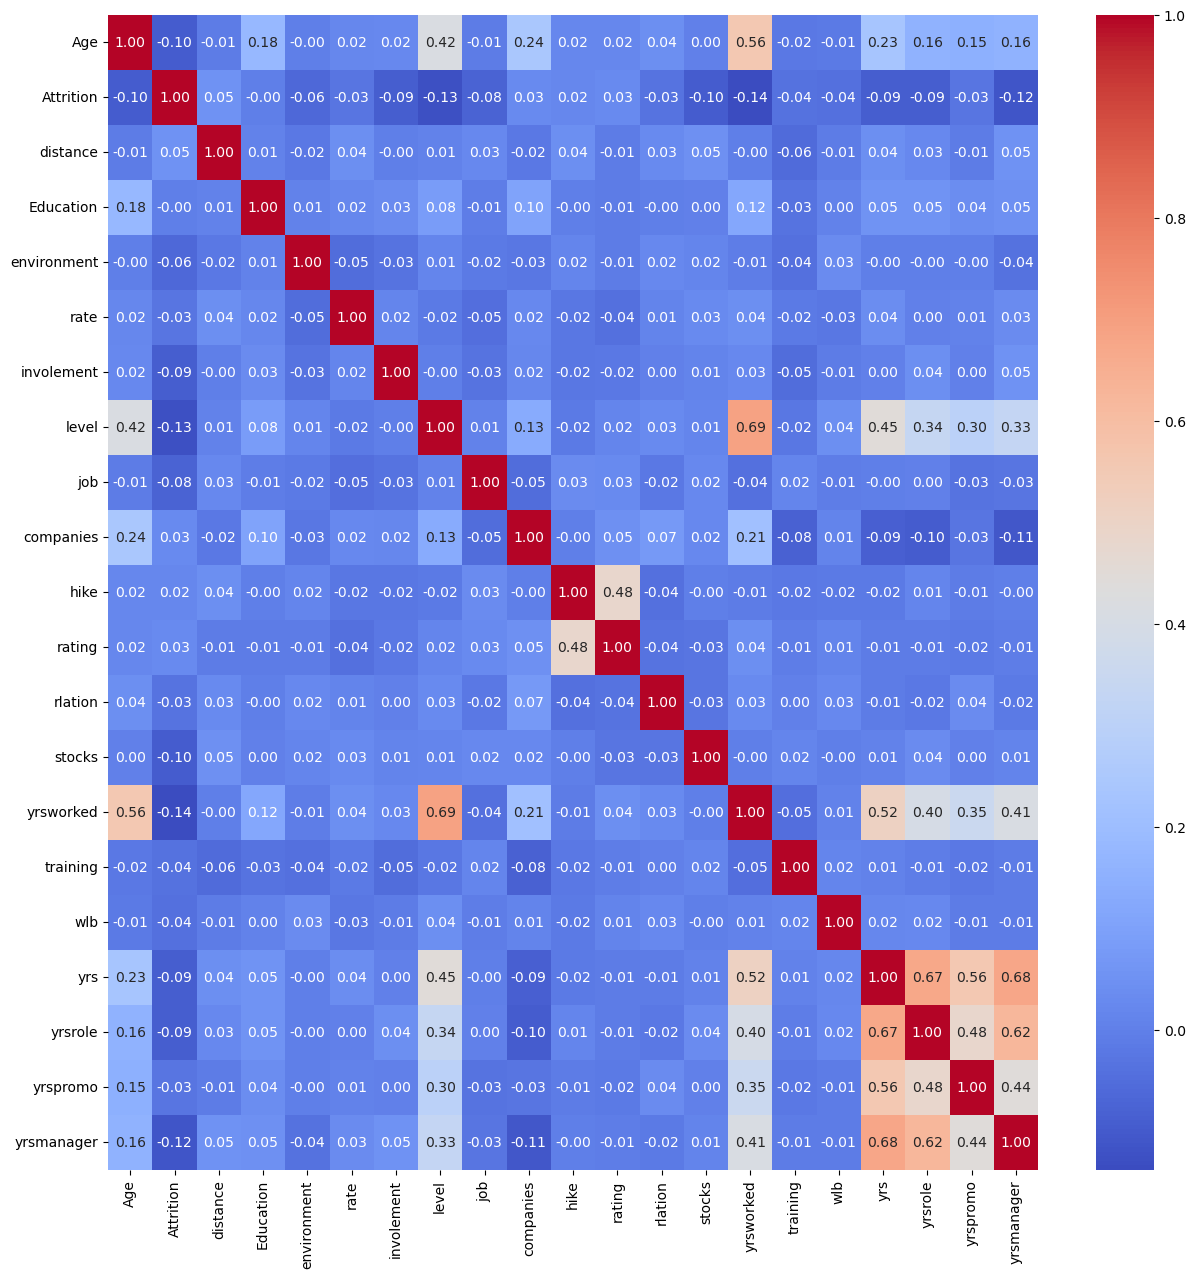

In [58]:
correlation_matrix = dfa.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## ANOVA 

for hypothesis testing and also to identify which columns will not be helpful in the machine learning model build up, for columns that follow a normal distribution

i use Shapiro to identify attributes that follow normal distribution

In [59]:
from scipy.stats import shapiro

integer_columns = dfa.select_dtypes(include='int32')

for column in integer_columns.columns:
    stat, p_value = shapiro(integer_columns[column])
    print(f"Shapiro-Wilk test for {column}: p-value = {p_value}")

    
    alpha = 0.05
    if p_value > alpha:
        print(f"The data in {column} appears to be normally distributed.\n")
    else:
        print(f"The data in {column} does not appear to be normally distributed.\n")



Shapiro-Wilk test for Age: p-value = 2.0213200515305048e-17
The data in Age does not appear to be normally distributed.

Shapiro-Wilk test for Attrition: p-value = 0.0
The data in Attrition does not appear to be normally distributed.

Shapiro-Wilk test for distance: p-value = 3.6963544757881606e-33
The data in distance does not appear to be normally distributed.

Shapiro-Wilk test for Education: p-value = 1.2292140017974647e-27
The data in Education does not appear to be normally distributed.

Shapiro-Wilk test for environment: p-value = 1.6171130963358188e-29
The data in environment does not appear to be normally distributed.

Shapiro-Wilk test for rate: p-value = 1.0731790456297574e-11
The data in rate does not appear to be normally distributed.

Shapiro-Wilk test for involement: p-value = 1.2685277262332895e-35
The data in involement does not appear to be normally distributed.

Shapiro-Wilk test for level: p-value = 4.791360515030696e-37
The data in level does not appear to be norma

- the Shapiro_Wilk test done indicates that there are no columns that follow a normal distribution. 
- i will try and tranform the attributes to make them follow a normal distribution to help in the machine learning model build up
- tranformation method will be the Box-Cox which employs both the logarithimic method and the square root method

In [60]:

from scipy.stats import boxcox

transformed_df = integer_columns.apply(lambda x: boxcox(x + 1)[0])

print("Original DataFrame:")
print(df)

print("\nTransformed DataFrame:")
print(transformed_df)



Original DataFrame:
            Age  Attrition             travel                     dpt  \
0     41.920786          1      Travel_Rarely                   Sales   
1     51.589037          0  Travel_Frequently  Research & Development   
2     33.131540          1      Travel_Rarely  Research & Development   
3     34.707073          0  Travel_Frequently                   Sales   
4     24.790188          0      Travel_Rarely  Research & Development   
...         ...        ...                ...                     ...   
1465  37.421699          0  Travel_Frequently  Research & Development   
1466  34.957777          0      Travel_Rarely  Research & Development   
1467  26.884296          0      Travel_Rarely  Research & Development   
1468  34.966424          0  Travel_Frequently         Human Resources   
1469  38.133892          0      Travel_Rarely  Research & Development   

       distance  Education          field     count  environment  Gender  \
0      1.016716   1.770313 

REDO  the Shapiro Milks test to see if that helps in data transformation

In [61]:
int_cols = transformed_df.select_dtypes(include='int32')

for column in int_cols.columns:
    stat, p_value = shapiro(int_cols[column])
    print(f"Shapiro-Wilk test for {column}: p-value = {p_value}")

    
    alpha = 0.05
    if p_value > alpha:
        print(f"The data in {column} appears to be normally distributed.\n")
    else:
        print(f"The data in {column} does not appear to be normally distributed.\n")

<Axes: xlabel='Age', ylabel='Count'>

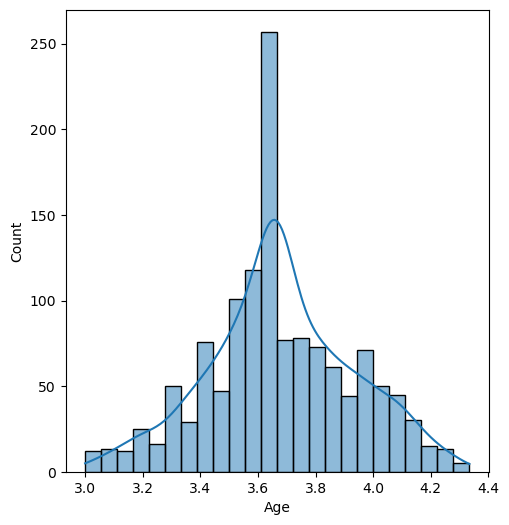

In [62]:
column_to_check = transformed_df['Age']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(column_to_check, kde=True)

<Axes: xlabel='level', ylabel='Count'>

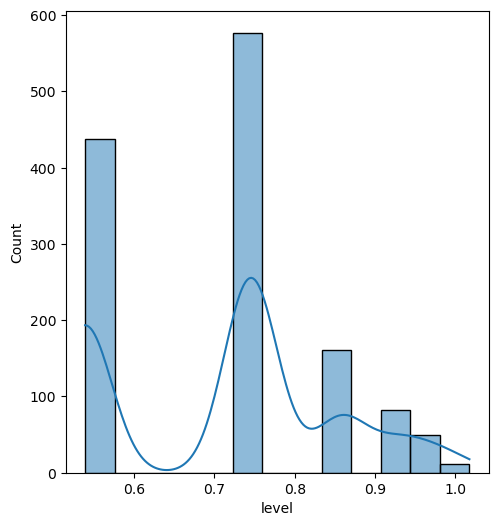

In [63]:
column_to_check = transformed_df['level']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(column_to_check, kde=True)

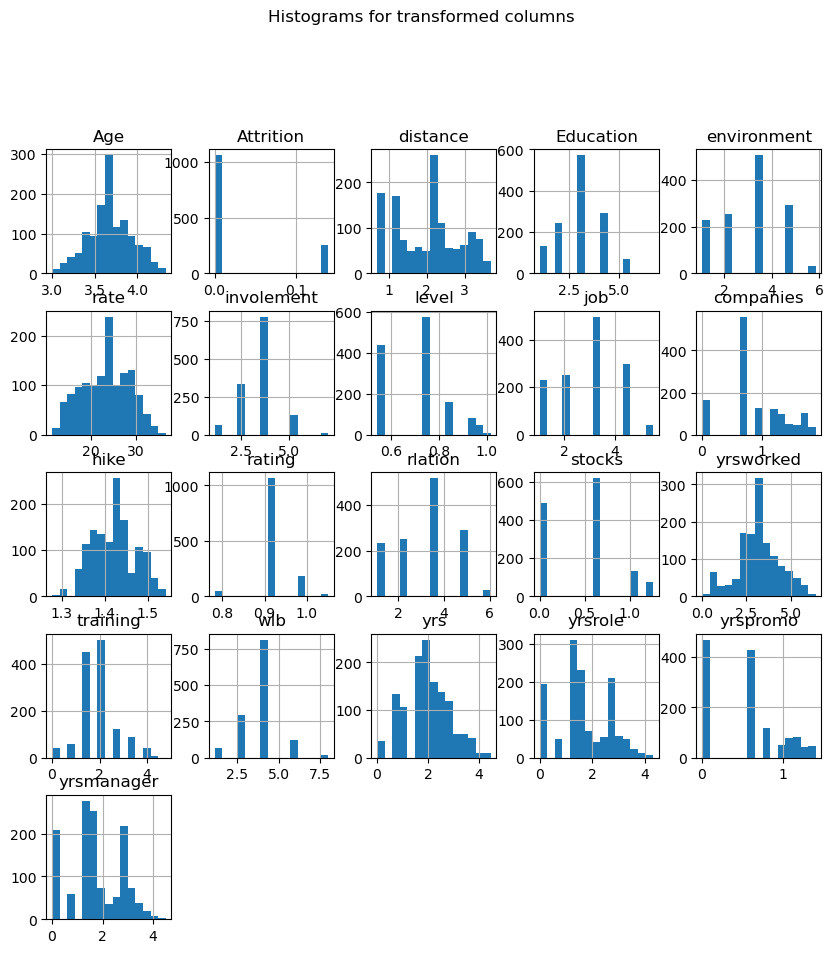

In [64]:
transformed_df.hist(bins=15, figsize=(10, 10))
plt.suptitle('Histograms for transformed columns', y=1.02)
plt.show()

columns like age, education, environment, rate, involvement, hike, rating, yrsworked, training, wlb and yrs now follow a somewhat normal distribution, and i will use for the anova test. 
- the other columns don't follow the normal distribution because of the amount of outliers, i will use standard scaling to bring these outlier values within a normal range.

In [65]:
nd_cols = transformed_df[['Age', 'Education', 'environment', 'rate', 'involement', 'hike', 'rating', 'yrsworked', 'training', 'wlb', 'yrs']]

In [66]:
unrelated_nd_cols = []
categorical_col = 'Attrition'


In [67]:
from scipy.stats import f_oneway
from scipy import stats

In [68]:
for i in nd_cols:
   
    grouped_data = [transformed_df[i][transformed_df[categorical_col] == category] for category in transformed_df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    alpha = 0.05

    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_nd_cols.append(i)

ANOVA statistic: 17.02
p-value: 3.937606196816702e-05
Reject the null hypothesis: There is a significant relationship between Age and Attrition

ANOVA statistic: 0.01
p-value: 0.9360487019766464
No significant relationship between Education and Attrition

ANOVA statistic: 5.27
p-value: 0.021868706818293168
Reject the null hypothesis: There is a significant relationship between environment and Attrition

ANOVA statistic: 1.36
p-value: 0.24400345584894087
No significant relationship between rate and Attrition

ANOVA statistic: 10.26
p-value: 0.0013927399534883643
Reject the null hypothesis: There is a significant relationship between involement and Attrition

ANOVA statistic: 0.41
p-value: 0.523830723445887
No significant relationship between hike and Attrition

ANOVA statistic: 0.8
p-value: 0.3712461668581877
No significant relationship between rating and Attrition

ANOVA statistic: 40.43
p-value: 2.8096223869009816e-10
Reject the null hypothesis: There is a significant relationship bet

In [69]:
print(f'The columns that failed the ANOVA test are {unrelated_nd_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['Education', 'rate', 'hike', 'rating', 'training', 'wlb']. These columns don't help in making predictions.


so i will also drop these columns that failed at the Anova test from the dataset since they won't add any value in predictions

In [70]:
transformed_df.drop(columns = unrelated_nd_cols, inplace=True)
transformed_df.shape

(1318, 15)

In [71]:
transformed_df.head()

,Age,Attrition,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager
0,3.851884,0.139123,0.697800,2.186041,3.858180,0.745556,3.230586,1.657935,1.064550,0.000000,2.941350,2.167573,1.951934,0.000000,2.241186
1,4.071429,0.000000,2.121691,3.371217,2.422075,0.745556,2.116236,0.641417,4.717328,0.660358,3.127825,2.740286,2.867637,0.571109,2.483117
2,3.605995,0.139123,1.110330,4.597776,2.422075,0.539152,3.230586,1.573333,2.222062,0.000000,2.941350,0.000000,0.000000,0.000000,0.000000
3,3.665776,0.000000,1.404988,4.597776,3.858180,0.539152,3.230586,0.641417,3.444402,0.000000,2.941350,2.482531,2.460759,0.953673,0.000000
4,3.325998,0.000000,1.110330,1.054294,3.858180,0.539152,2.116236,1.849656,3.444402,0.660358,2.516174,1.167066,1.251679,0.813232,1.257889


In [72]:
transformed_df.columns

Index(['Age', 'Attrition', 'distance', 'environment', 'involement', 'level',
       'job', 'companies', 'rlation', 'stocks', 'yrsworked', 'yrs', 'yrsrole',
       'yrspromo', 'yrsmanager'],
      dtype='object')

the transformed_df dataset is comprised of only int32 values hence i have to comp=bine that with the object columns from the original dataset

In [73]:
dfa.shape

(1318, 29)

In [74]:
dfa.dtypes

Age             int32
Attrition       int32
travel         object
dpt            object
distance        int32
Education       int32
field          object
environment     int32
Gender         object
rate            int32
involement      int32
level           int32
role           object
job             int32
marriage       object
companies       int32
Over18         object
OverTime       object
hike            int32
rating          int32
rlation         int32
stocks          int32
yrsworked       int32
training        int32
wlb             int32
yrs             int32
yrsrole         int32
yrspromo        int32
yrsmanager      int32
dtype: object

In [75]:
obj_columns_df = dfa.select_dtypes(include=['object'])

print(obj_columns_df)

                 travel                     dpt          field  Gender  \
0         Travel_Rarely                   Sales  Life Sciences    Male   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently                   Sales  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently         Human Resources        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                           role marriage Over18 OverTime  
0               Sales Executive   Single      Y     

In [76]:
obj_columns_df.head()

,travel,dpt,field,Gender,role,marriage,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


#### Merging the 2 datasets

In [77]:
merged_df = pd.concat([obj_columns_df, transformed_df], axis=1)

In [78]:
merged_df.head()

,travel,dpt,field,Gender,role,marriage,Over18,OverTime,Age,Attrition,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager
0,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes,3.851884,0.139123,0.697800,2.186041,3.858180,0.745556,3.230586,1.657935,1.064550,0.000000,2.941350,2.167573,1.951934,0.000000,2.241186
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,4.071429,0.000000,2.121691,3.371217,2.422075,0.745556,2.116236,0.641417,4.717328,0.660358,3.127825,2.740286,2.867637,0.571109,2.483117
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,3.605995,0.139123,1.110330,4.597776,2.422075,0.539152,3.230586,1.573333,2.222062,0.000000,2.941350,0.000000,0.000000,0.000000,0.000000
3,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Y,Yes,3.665776,0.000000,1.404988,4.597776,3.858180,0.539152,3.230586,0.641417,3.444402,0.000000,2.941350,2.482531,2.460759,0.953673,0.000000
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,3.325998,0.000000,1.110330,1.054294,3.858180,0.539152,2.116236,1.849656,3.444402,0.660358,2.516174,1.167066,1.251679,0.813232,1.257889


In [79]:
merged_df.shape

(1318, 23)

the 'over18 column' just contain a constant firgure hence i will drop it.

In [80]:
dff = merged_df.drop('Over18', axis=1)

## Encoding.

the process of encoding is done to convert categorical data into integers that can be using bu the machine learning algorithms. the method i selected for the encoding is the Label Encoding because of the nature of my dataset.

In [81]:
dff_original = dff.copy()

In [82]:
object_columns = dff.select_dtypes(include=['object']).columns.tolist()

print("Object columns:", object_columns)


Object columns: ['travel', 'dpt', 'field', 'Gender', 'role', 'marriage', 'OverTime']


In [83]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dff[object_columns] = dff[object_columns].apply(label_encoder.fit_transform)

In [84]:
for column in object_columns:
    unique_encoded_values = dff[column].unique()   
    print(f"Unique encoded values for column '{column}' {dff_original[column].unique()} : {unique_encoded_values}")

Unique encoded values for column 'travel' ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] : [2 1 0]
Unique encoded values for column 'dpt' ['Sales' 'Research & Development' 'Human Resources'] : [2 1 0]
Unique encoded values for column 'field' ['Life Sciences' 'Other' 'Medical' 'Technical Degree' 'Marketing'
 'Human Resources'] : [1 4 3 5 2 0]
Unique encoded values for column 'Gender' ['Male' 'Female'] : [1 0]
Unique encoded values for column 'role' ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Healthcare Representative' 'Manufacturing Director'
 'Sales Representative' 'Research Director' 'Manager' 'Human Resources'] : [7 6 2 0 4 8 5 3 1]
Unique encoded values for column 'marriage' ['Single' 'Married' 'Divorced'] : [2 1 0]
Unique encoded values for column 'OverTime' ['Yes' 'No'] : [1 0]


In [85]:
dff.head()

,travel,dpt,field,Gender,role,marriage,OverTime,Age,Attrition,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager
0,2,2,1,1,7,2,1,3.851884,0.139123,0.697800,2.186041,3.858180,0.745556,3.230586,1.657935,1.064550,0.000000,2.941350,2.167573,1.951934,0.000000,2.241186
1,1,1,1,1,6,1,0,4.071429,0.000000,2.121691,3.371217,2.422075,0.745556,2.116236,0.641417,4.717328,0.660358,3.127825,2.740286,2.867637,0.571109,2.483117
2,2,1,4,1,2,2,1,3.605995,0.139123,1.110330,4.597776,2.422075,0.539152,3.230586,1.573333,2.222062,0.000000,2.941350,0.000000,0.000000,0.000000,0.000000
3,1,2,1,0,6,1,1,3.665776,0.000000,1.404988,4.597776,3.858180,0.539152,3.230586,0.641417,3.444402,0.000000,2.941350,2.482531,2.460759,0.953673,0.000000
4,2,1,3,1,2,1,0,3.325998,0.000000,1.110330,1.054294,3.858180,0.539152,2.116236,1.849656,3.444402,0.660358,2.516174,1.167066,1.251679,0.813232,1.257889


a big disadvantage of this encoding method is that it assigns a unique number from 0 to each class of data, hence a label with a high value maybe considered of more priority than one with a lower value. as an example for the Attribute, 'Role' a 'sales representative'is now represented by value '8' while a 'Healthcare representative' is now 0. this might look like the sales representative is more important than the healthcare representative.

- hence we have to try the one_hot encoding method which assigns a binary number to indicate presence of any variable. i think this will be perfect my dataset since the dataset is  not inorder(nominal)

In [86]:
dff_original.head()

,travel,dpt,field,Gender,role,marriage,OverTime,Age,Attrition,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager
0,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,3.851884,0.139123,0.697800,2.186041,3.858180,0.745556,3.230586,1.657935,1.064550,0.000000,2.941350,2.167573,1.951934,0.000000,2.241186
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,4.071429,0.000000,2.121691,3.371217,2.422075,0.745556,2.116236,0.641417,4.717328,0.660358,3.127825,2.740286,2.867637,0.571109,2.483117
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,3.605995,0.139123,1.110330,4.597776,2.422075,0.539152,3.230586,1.573333,2.222062,0.000000,2.941350,0.000000,0.000000,0.000000,0.000000
3,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes,3.665776,0.000000,1.404988,4.597776,3.858180,0.539152,3.230586,0.641417,3.444402,0.000000,2.941350,2.482531,2.460759,0.953673,0.000000
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,3.325998,0.000000,1.110330,1.054294,3.858180,0.539152,2.116236,1.849656,3.444402,0.660358,2.516174,1.167066,1.251679,0.813232,1.257889


In [110]:
dff_original.shape


(1318, 22)

In [87]:
y = dff_original['Attrition']
X = dff_original.drop(columns = ['Attrition'])

for the column 'Gender' we can manually encode male to be 0 and female to be 1 and also overtime, for no to be 0 and yes 1

In [88]:
X['Gender'] = np.where(X['Gender'] == 'Male', 0, 1)

X['OverTime'] = np.where(X['OverTime'] == 'No', 0, 1)

In [89]:
dff_cat_cols = X.select_dtypes(include='object')

In [90]:
dff_cat_cols.head()

,travel,dpt,field,role,marriage
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Sales,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [91]:
dff_cat_encoded = pd.get_dummies(dff_cat_cols)

In [92]:
dff_cat_encoded.head()

,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Human Resources,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [93]:
dff_num_cols = X.select_dtypes(include=np.number)

In [94]:
dff_num_cols.head()

,Gender,OverTime,Age,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager
0,0,1,3.851884,0.697800,2.186041,3.858180,0.745556,3.230586,1.657935,1.064550,0.000000,2.941350,2.167573,1.951934,0.000000,2.241186
1,0,0,4.071429,2.121691,3.371217,2.422075,0.745556,2.116236,0.641417,4.717328,0.660358,3.127825,2.740286,2.867637,0.571109,2.483117
2,0,1,3.605995,1.110330,4.597776,2.422075,0.539152,3.230586,1.573333,2.222062,0.000000,2.941350,0.000000,0.000000,0.000000,0.000000
3,1,1,3.665776,1.404988,4.597776,3.858180,0.539152,3.230586,0.641417,3.444402,0.000000,2.941350,2.482531,2.460759,0.953673,0.000000
4,0,0,3.325998,1.110330,1.054294,3.858180,0.539152,2.116236,1.849656,3.444402,0.660358,2.516174,1.167066,1.251679,0.813232,1.257889


In [95]:
X_true = pd.concat([dff_num_cols, dff_cat_encoded], axis=1)

In [96]:
X_true.head()

,Gender,OverTime,Age,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Human Resources,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single
0,0,1,3.851884,0.697800,2.186041,3.858180,0.745556,3.230586,1.657935,1.064550,0.000000,2.941350,2.167573,1.951934,0.000000,2.241186,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,4.071429,2.121691,3.371217,2.422075,0.745556,2.116236,0.641417,4.717328,0.660358,3.127825,2.740286,2.867637,0.571109,2.483117,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,3.605995,1.110330,4.597776,2.422075,0.539152,3.230586,1.573333,2.222062,0.000000,2.941350,0.000000,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,3.665776,1.404988,4.597776,3.858180,0.539152,3.230586,0.641417,3.444402,0.000000,2.941350,2.482531,2.460759,0.953673,0.000000,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,3.325998,1.110330,1.054294,3.858180,0.539152,2.116236,1.849656,3.444402,0.660358,2.516174,1.167066,1.251679,0.813232,1.257889,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [97]:
X_true.shape

(1318, 40)

In [111]:
X_true['Attrition'] = dff_original['Attrition']
X_true.shape

(1318, 41)

## Scaling

looking at the dataset now, there are features with larger values, these can be dorminating over other features with smaller values, so we have to scale them to ensure all features contributes equally to the machine learning models.

- earlier on i had seen some outliers in the dataset but chose to ignore them. but this may bring a distortion in the Machine learning algorithm hence i will use the Robust Scalling method which uses the median and the IQR to handle outliers.
- scaling also helps data with high dimensionallity on the Principal Component Analysis

In [112]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [113]:
columns_to_scale = X_true.columns

In [114]:
X_true_scaled = X_true.copy()
X_true_scaled[columns_to_scale] = scaler.fit_transform(X_true[columns_to_scale])

In [115]:
X_true_scaled.head()

,Gender,OverTime,Age,distance,environment,involement,level,job,companies,rlation,stocks,yrsworked,yrs,yrsrole,yrspromo,yrsmanager,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Human Resources,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single,Attrition
0,0.0,1.0,0.601810,-0.937324,-1.000000,0.0,0.0,0.00000,1.437753,-1.946964,-1.0,-0.135359,0.168613,0.222277,-0.702271,0.412592,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.139123
1,0.0,0.0,1.311738,0.000000,0.000000,-1.0,0.0,-0.49453,0.000000,1.041384,0.0,0.000000,0.679646,0.866092,0.000000,0.580345,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,1.0,-0.193310,-0.665762,1.034917,-1.0,-1.0,0.00000,1.318091,-1.000000,-1.0,-0.135359,-1.765517,-1.150097,-0.702271,-1.141420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.139123
3,1.0,1.0,0.000000,-0.471794,1.034917,0.0,-1.0,0.00000,0.000000,0.000000,-1.0,-0.135359,0.449651,0.580023,0.470424,-1.141420,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,-1.098719,-0.665762,-1.954920,0.0,-1.0,-0.49453,1.708920,0.000000,0.0,-0.443986,-0.724141,-0.270062,0.297729,-0.269214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Principal Component Analysis (PCA)

the dataset we have here has a lot of variables and also considering the encoding method employed those variables sort of increased to 33 columns and we need to employ dimenstionality reduction technique to help simplify the data while retaining its essential information. 

PCA works by tranforming correlated variables into smaller number of uncorrelated variables effectivley summarising the key patterns in the dataset.

- this reduction of number of variables also help with simplifying data visuals and analysis, easily identifying patterns and relationships within the data

- eliminating highly correlated features helps reduces the risk of data overfitting in machine learning model. Overfitting in machine learning is when a model fita the training data too closely and fail to capture the true relationships between variables, in the end poorly performing on new data

In [116]:
from sklearn.decomposition import PCA

In [118]:
y = X_true_scaled['Attrition']
X = X_true_scaled.drop(columns = ['Attrition'])

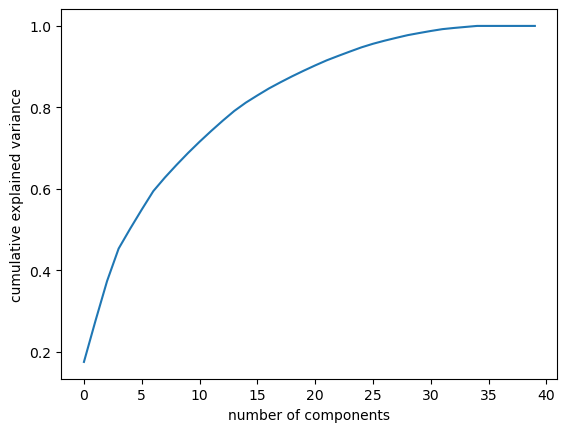

In [119]:
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

from the graph above to get a variance of 95% to 99% variance we need about 25 principal components

In [120]:
pca = PCA(25)
projected = pca.fit_transform(X)

In [121]:
projected.shape

(1318, 25)

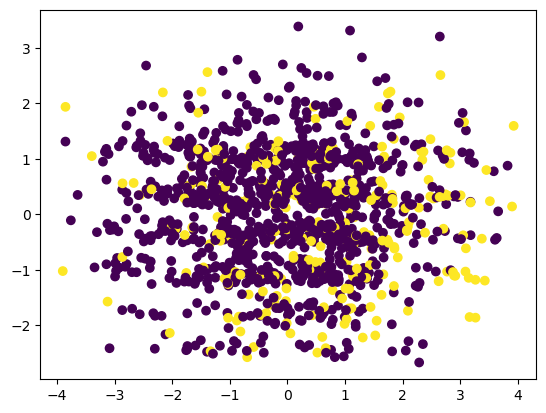

In [122]:
plt.scatter(projected[:, 0], projected[:, 1], c=y, cmap='viridis', marker='o')
plt.show()

In [123]:
attrition_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25'])

In [124]:
attrition_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25
0,-0.287848,-1.627664,0.344057,1.056184,-0.474857,1.151555,0.960878,-0.019452,-0.885464,0.234198,0.033245,-0.059332,-1.143109,-0.006561,-0.320739,-0.428620,0.868299,-0.417102,-0.652494,-0.175096,0.184631,-0.267662,-0.166645,-0.070170,0.163048
1,-1.117786,1.106308,-0.642634,-0.506825,-0.283700,-1.050939,-0.667075,1.122892,-0.472447,0.832435,-0.262724,0.480265,0.202379,0.222391,-0.184091,-0.088143,0.075974,-0.304709,0.282195,-0.672614,-0.164563,-0.500538,-0.199611,-0.501217,-0.161760
2,2.452834,0.619879,1.025698,1.691002,-0.910505,-0.583496,0.984075,-0.485571,-0.306189,-0.183987,-0.142809,-0.172777,-0.328310,-0.180722,-0.439728,-0.020739,0.771244,0.158381,-0.312169,0.502739,-0.007968,0.852723,0.039844,0.383172,-0.364972
3,0.467956,1.026976,0.816043,-0.508326,0.038448,0.424844,0.228657,0.807276,-0.868415,0.958511,-0.603950,0.044897,0.249785,-0.330578,1.060712,0.363785,0.675621,-0.285467,0.973476,0.566148,0.828968,-0.499114,0.295166,-0.286734,0.042958
4,1.324292,-0.965530,-1.447237,0.043023,0.669263,-0.539390,-0.324733,-1.247946,-0.951101,-0.846013,-0.933199,-0.297721,-0.128806,-0.431107,-0.445697,0.363984,-0.348439,-0.076987,-0.364222,0.631349,-0.282202,0.148359,-0.144019,0.105581,-0.190288


In [125]:
attrition_pca.shape

(1318, 25)

In [126]:
attrition_pca['Attrition'] = X_true_scaled['Attrition']

In [127]:
attrition_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,Attrition
0,-0.287848,-1.627664,0.344057,1.056184,-0.474857,1.151555,0.960878,-0.019452,-0.885464,0.234198,0.033245,-0.059332,-1.143109,-0.006561,-0.320739,-0.428620,0.868299,-0.417102,-0.652494,-0.175096,0.184631,-0.267662,-0.166645,-0.070170,0.163048,0.139123
1,-1.117786,1.106308,-0.642634,-0.506825,-0.283700,-1.050939,-0.667075,1.122892,-0.472447,0.832435,-0.262724,0.480265,0.202379,0.222391,-0.184091,-0.088143,0.075974,-0.304709,0.282195,-0.672614,-0.164563,-0.500538,-0.199611,-0.501217,-0.161760,0.000000
2,2.452834,0.619879,1.025698,1.691002,-0.910505,-0.583496,0.984075,-0.485571,-0.306189,-0.183987,-0.142809,-0.172777,-0.328310,-0.180722,-0.439728,-0.020739,0.771244,0.158381,-0.312169,0.502739,-0.007968,0.852723,0.039844,0.383172,-0.364972,0.139123
3,0.467956,1.026976,0.816043,-0.508326,0.038448,0.424844,0.228657,0.807276,-0.868415,0.958511,-0.603950,0.044897,0.249785,-0.330578,1.060712,0.363785,0.675621,-0.285467,0.973476,0.566148,0.828968,-0.499114,0.295166,-0.286734,0.042958,0.000000
4,1.324292,-0.965530,-1.447237,0.043023,0.669263,-0.539390,-0.324733,-1.247946,-0.951101,-0.846013,-0.933199,-0.297721,-0.128806,-0.431107,-0.445697,0.363984,-0.348439,-0.076987,-0.364222,0.631349,-0.282202,0.148359,-0.144019,0.105581,-0.190288,0.000000


In [128]:
attrition_pca.shape

(1318, 26)

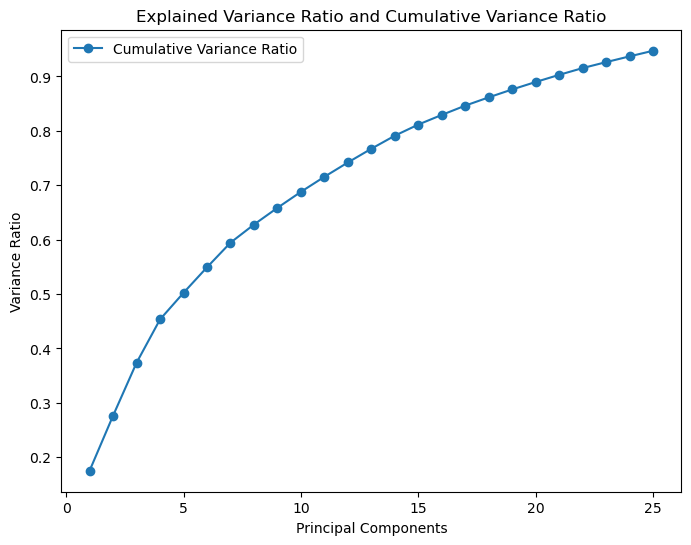

In [130]:
num_components = 25

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), cumulative_variance_ratio, label='Cumulative Variance Ratio', marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Variance Ratio')
plt.legend()
plt.show()

## Machine Learning

### Logistic Regression

In [135]:
from sklearn.model_selection import train_test_split
X_pca = attrition_pca.drop('Attrition', axis=1)
y_pca = X_true_scaled['Attrition']
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.20, random_state=42)

In [136]:
print(X_pca_train.shape)
print(X_pca_test.shape)
print(y_pca_train.shape)
print(y_pca_test.shape)

(1054, 25)
(264, 25)
(1054,)
(264,)


In [137]:
y_pca.unique()

array([0.13912339, 0.        ])

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

lrm = LinearRegression()

lrm.fit(X_pca_train,y_pca_train)

LinearRegression()

In [139]:
y_pca_pred = lrm.predict(X_pca_test)

print(lrm.intercept_)

print(lrm.coef_)

0.027440271406961557
[ 0.00776422 -0.0048286  -0.00190667 -0.00085129 -0.00831028  0.0008157
  0.00267426 -0.00495709 -0.00769434  0.00765637 -0.00255391  0.00902279
  0.00652181  0.00687406 -0.00189637  0.01008413  0.01778242 -0.00359526
 -0.00813512  0.00276139  0.00743349  0.01462737  0.00890435 -0.00907113
 -0.00499434]


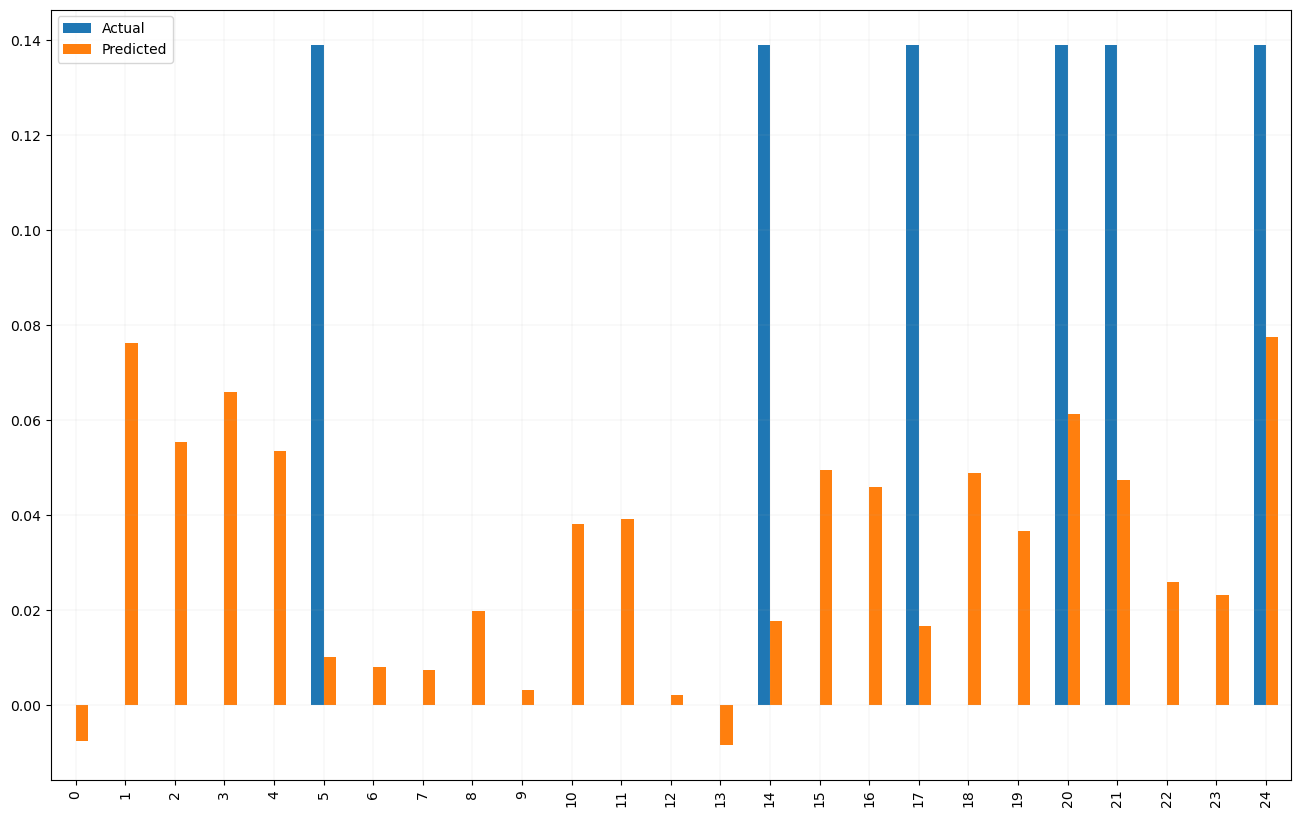

In [140]:
attrition_pca_lrm = pd.DataFrame({'Actual': y_pca_test.to_numpy().flatten(), 'Predicted': y_pca_pred.flatten()})


df1 = attrition_pca_lrm.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [141]:
MSE_LR=mean_squared_error(y_pca_test, y_pca_pred)
RMSE_LR=np.sqrt(mean_squared_error(y_pca_test, y_pca_pred))
MAE_LR=np.sqrt(mean_absolute_error(y_pca_test, y_pca_pred))
R2_LR=r2_score(y_pca_test, y_pca_pred)

print("MSE: ", mean_squared_error(y_pca_test, y_pca_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_pca_test, y_pca_pred)))
print("MAE: ", np.sqrt(mean_absolute_error(y_pca_test, y_pca_pred)))
print("R2 Score: ", r2_score(y_pca_test, y_pca_pred))

MSE:  0.0029444825660256252
RMSE:  0.05426308658771288
MAE:  0.20334688331945247
R2 Score:  0.009093347007917751


## XGB Regressor

In [142]:
pip install xgboost

In [143]:
import xgboost
from xgboost import XGBRegressor

In [144]:
XGB = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB.fit(X_pca_train,y_pca_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [145]:
y_predx = XGB.predict(X_pca_test)

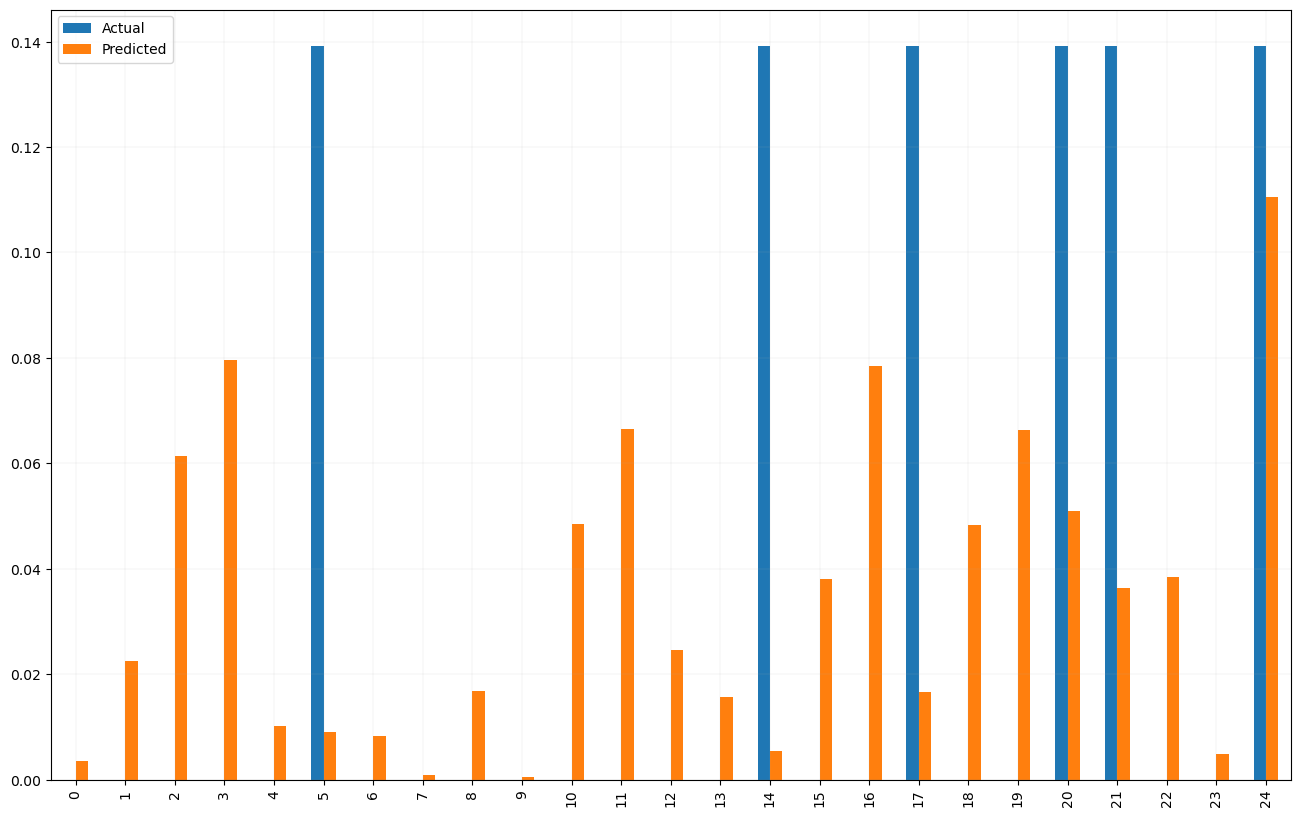

In [146]:
attrition_pca_xgb = pd.DataFrame({'Actual': y_pca_test.to_numpy().flatten(), 'Predicted': y_predx.flatten()})
df1 = attrition_pca_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [147]:
MSE_XGB=mean_squared_error(y_pca_test, y_predx)
print("MSE: ", mean_squared_error(y_pca_test, y_predx))


RMSE_XGB=np.sqrt(mean_squared_error(y_pca_test, y_predx))
print("RMSE: ", np.sqrt(mean_squared_error(y_pca_test, y_predx)))


MAE_XGB=np.sqrt(mean_absolute_error(y_pca_test, y_predx))
print("MAE: ", np.sqrt(mean_absolute_error(y_pca_test, y_predx)))
       
R2_XGB=r2_score(y_pca_test, y_predx)
print("R2 Score: ", r2_score(y_pca_test, y_predx))

MSE:  0.0030823994518196793
RMSE:  0.055519361053777264
MAE:  0.2004272229346347
R2 Score:  -0.037319819526038245


In [148]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y_pca)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [128]:
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

classifier = lrm(random_state=42)
classifier.fit(X_resampled, y_resampled)

y_preds = classifier.predict(X_pca_test)

# Evaluate the classifier
print("\nClassification Report:")
print(classification_report(y_pca_test, y_preds))


After SMOTE:
1    1065
0    1065
Name: Attrition, dtype: int64


TypeError: 'LinearRegression' object is not callable